In [1]:
from importlib import reload  # Python 3.4+
import XY_model
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncexpon
reload(XY_model)

<module 'XY_model' from '/Users/mw/PycharmProjects/xymodel-st-data/XY-MODEL/XY_model.py'>

sweeps=1
energy=-12.611472375222988

equilibrium state is reached at T=0.1
#sweep=502
energy=-19.49488051547998


/Users/mw/PycharmProjects/xymodel-st-data/XY-MODEL/XY_model.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


array([[6.86794372, 7.58514277, 7.45097131, ..., 5.78679143, 7.51384208,
        7.93772977],
       [7.22451807, 7.40093485, 8.09144368, ..., 7.00507933, 8.35726295,
        8.7316798 ],
       [6.6853594 , 7.547846  , 8.21369621, ..., 7.29178941, 6.94826053,
        7.84126492],
       ...,
       [5.72407852, 7.10220088, 6.90800617, ..., 6.7189648 , 7.05190908,
        7.51044175],
       [7.19847055, 7.38605567, 7.35046957, ..., 6.5806633 , 6.73997107,
        8.67596457],
       [7.2559933 , 7.2812553 , 7.84798515, ..., 6.05664917, 5.37671231,
        8.16835161]])

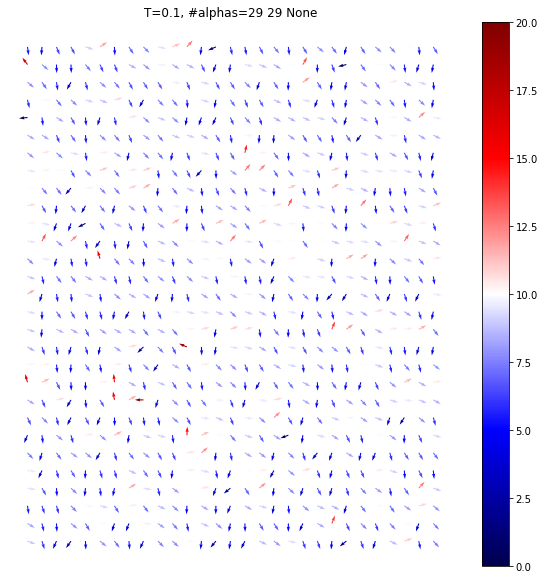

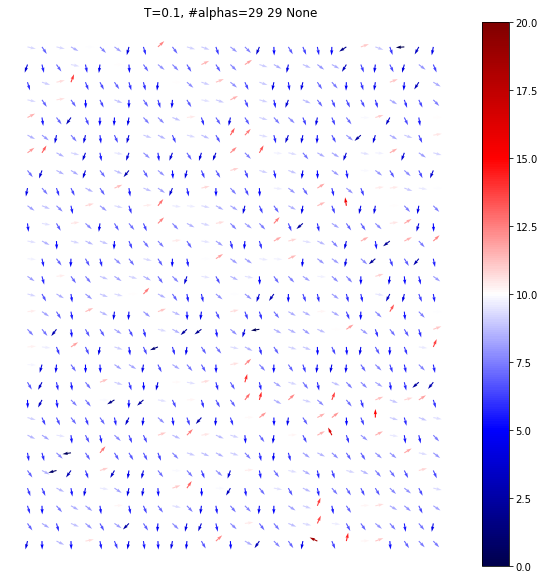

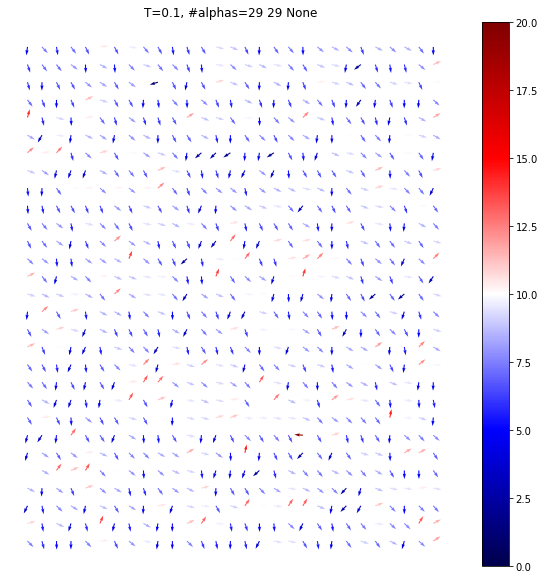

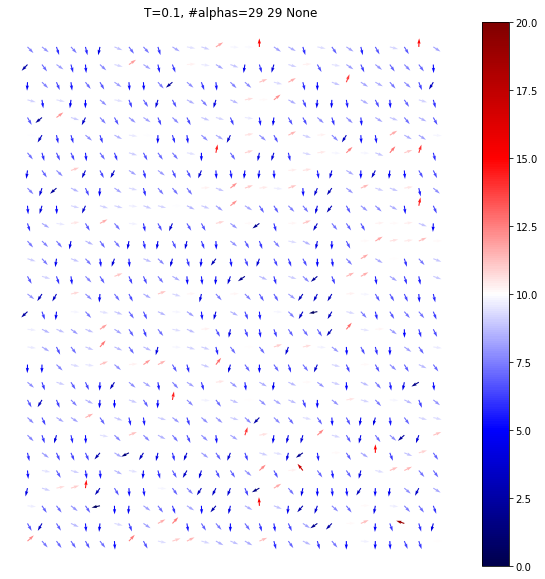

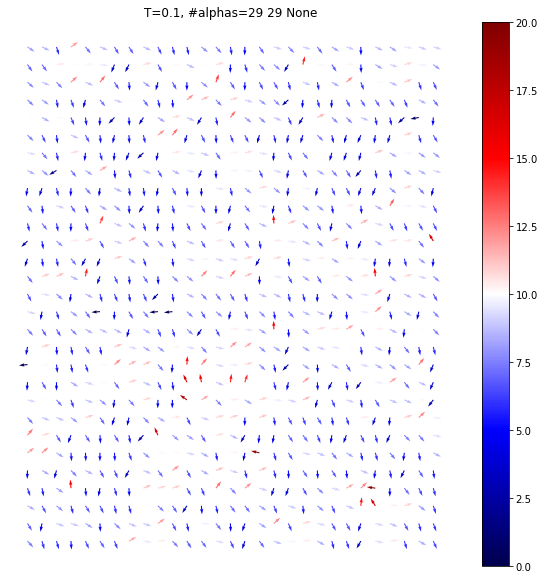

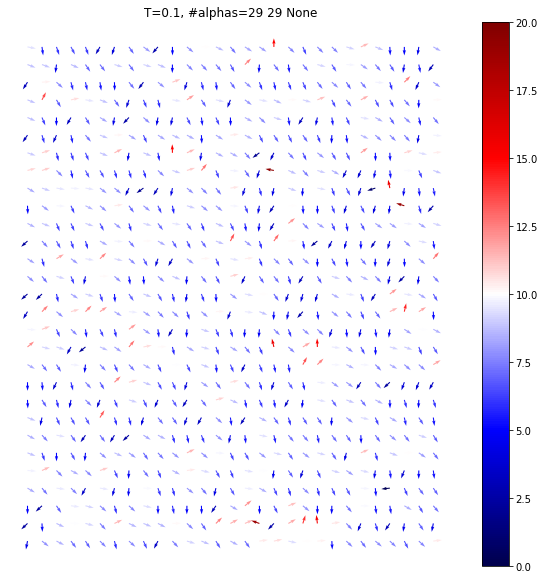

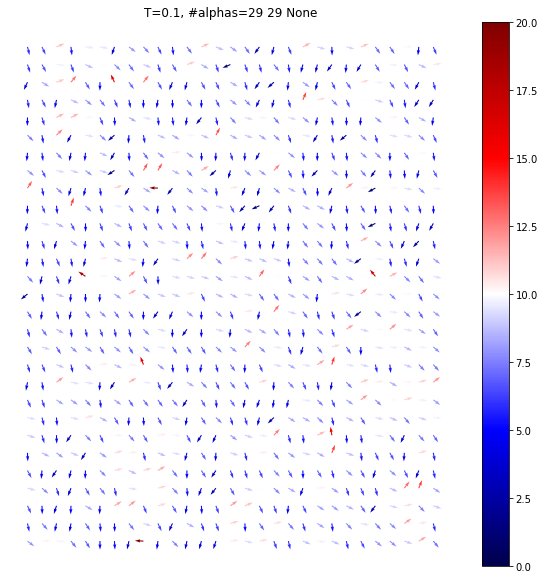

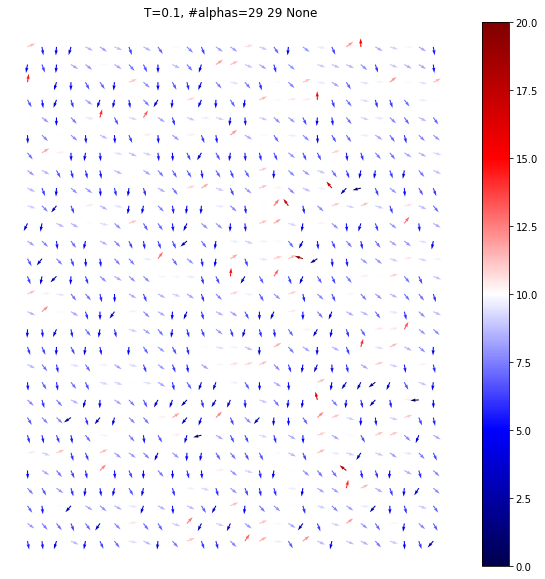

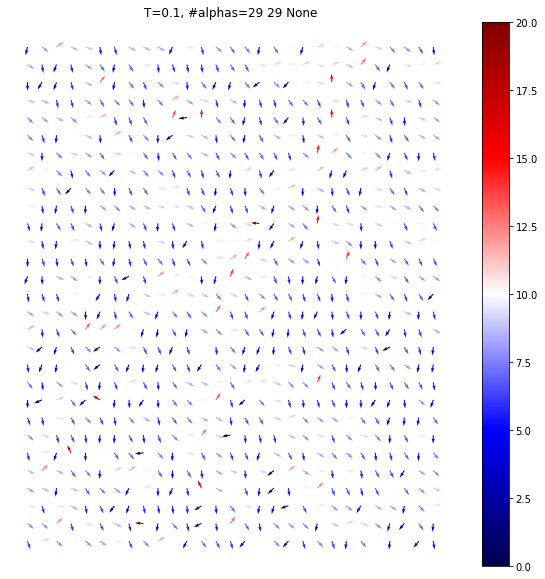

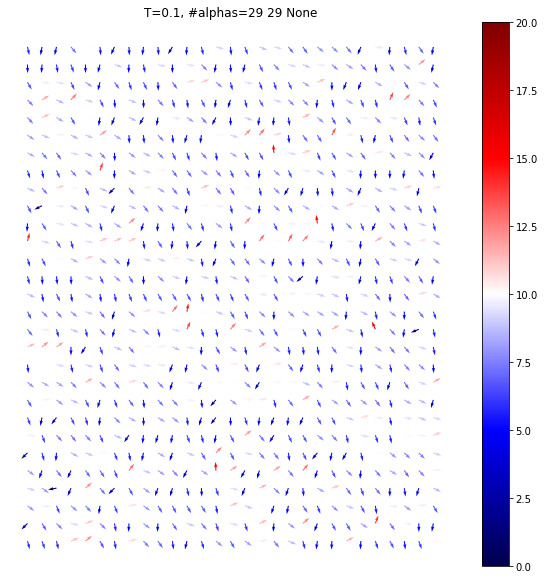

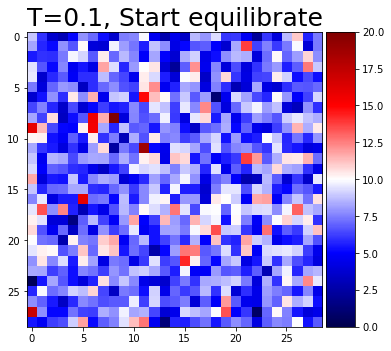

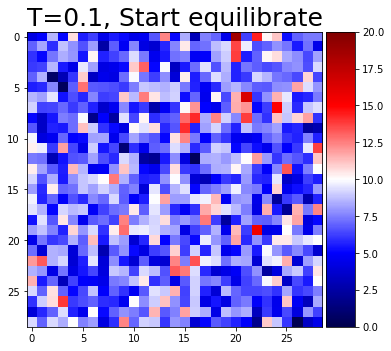

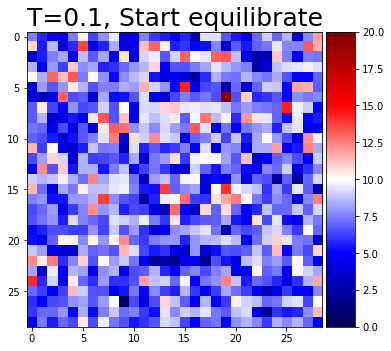

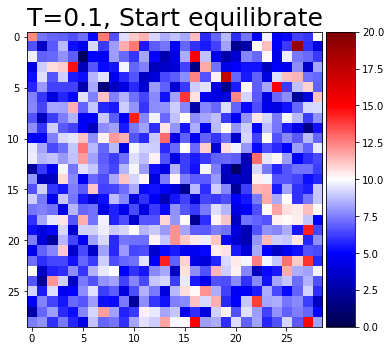

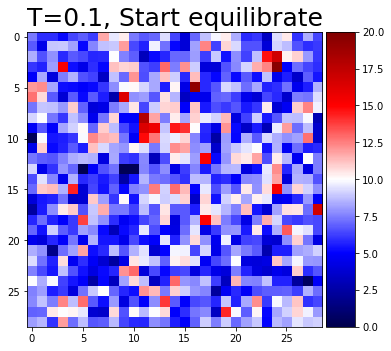

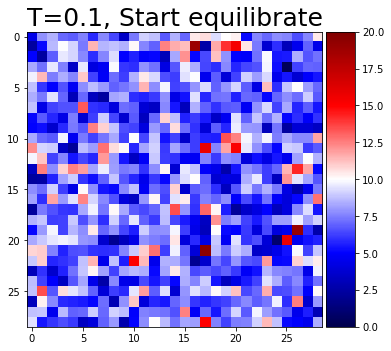

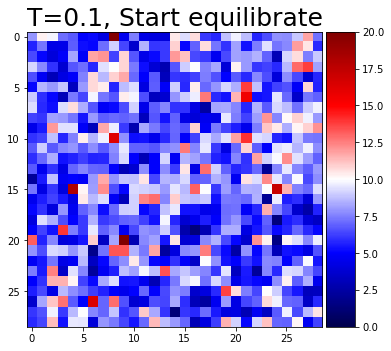

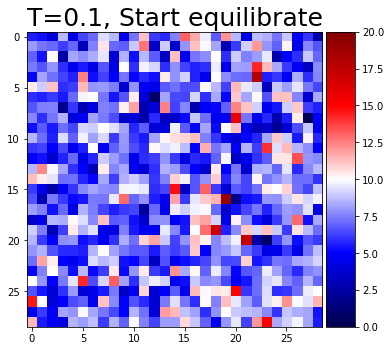

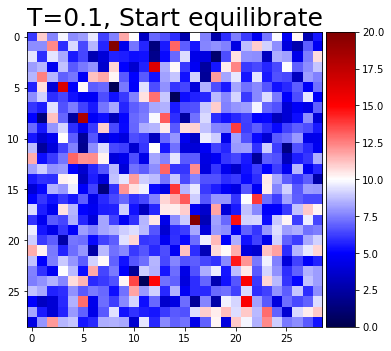

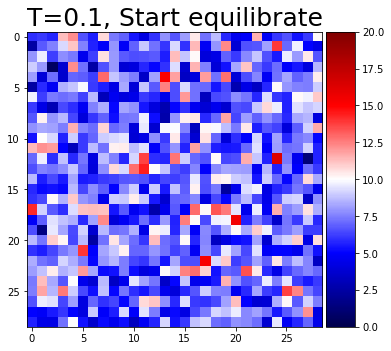

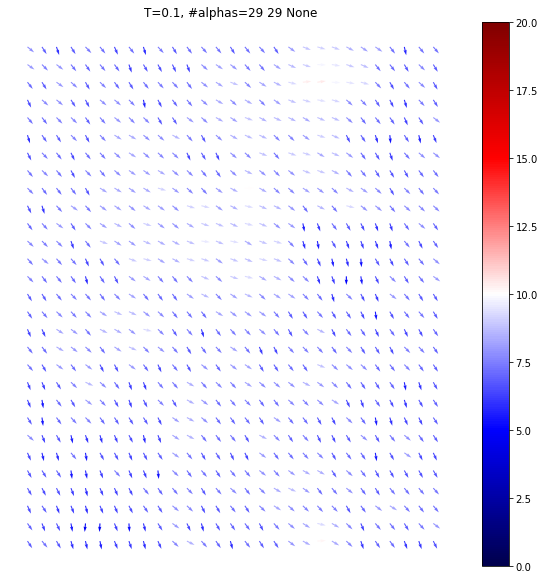

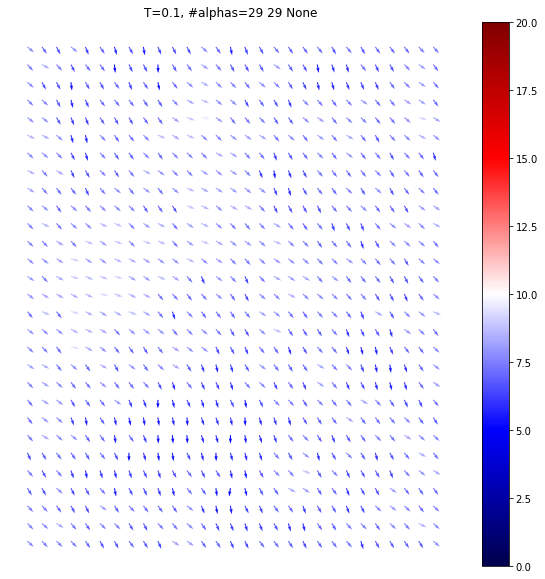

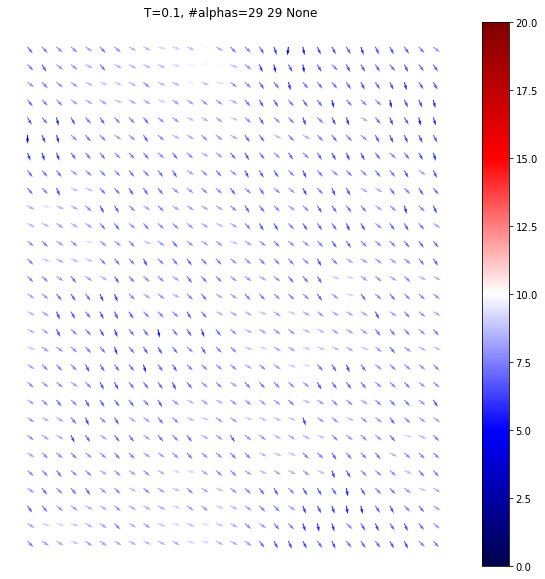

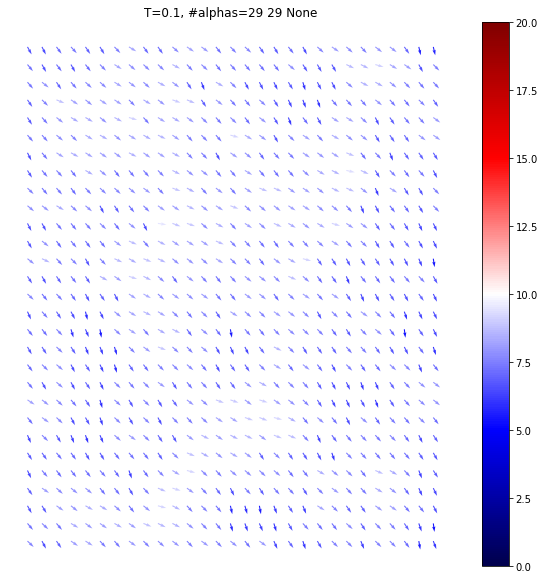

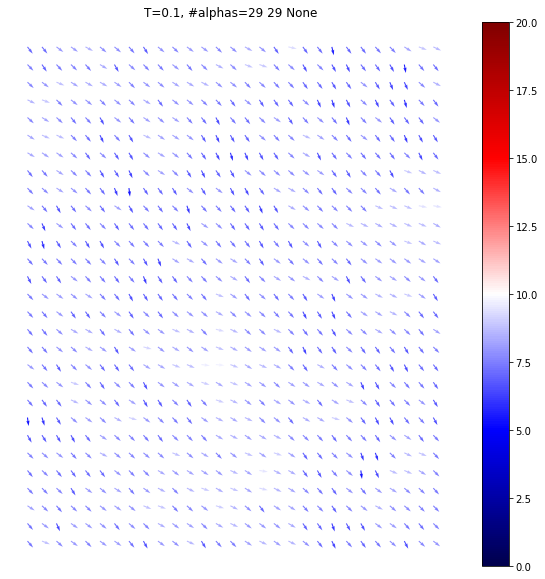

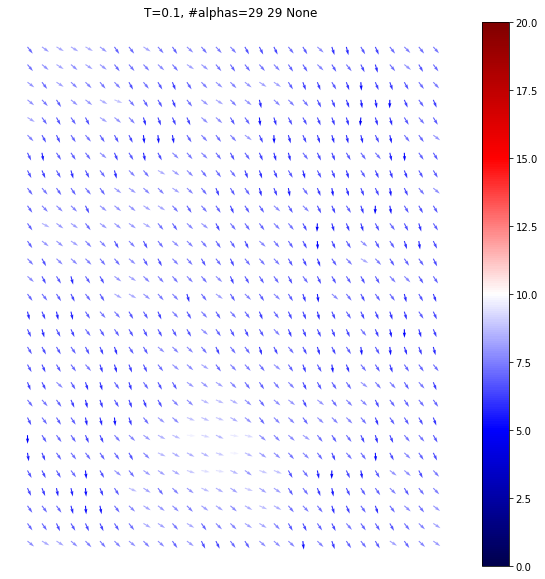

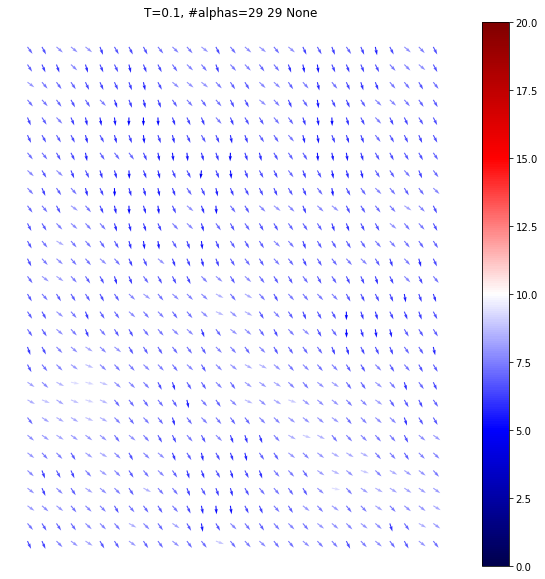

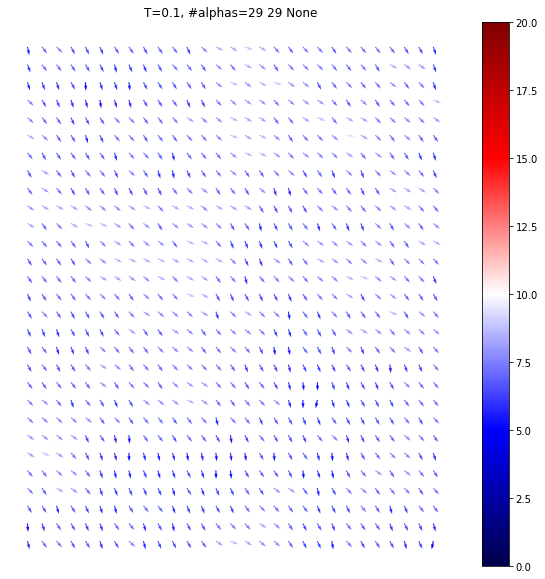

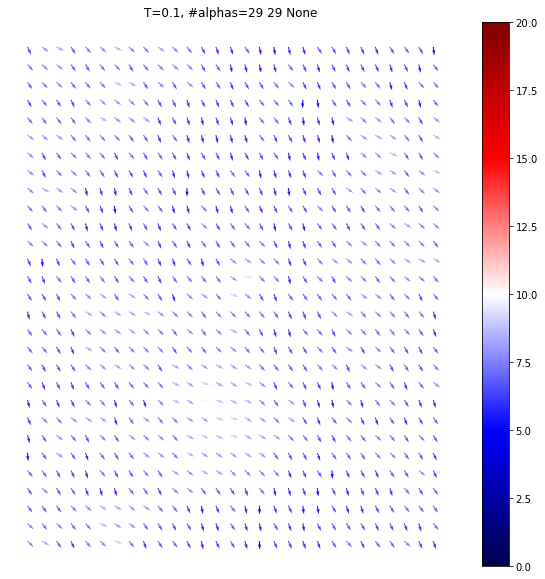

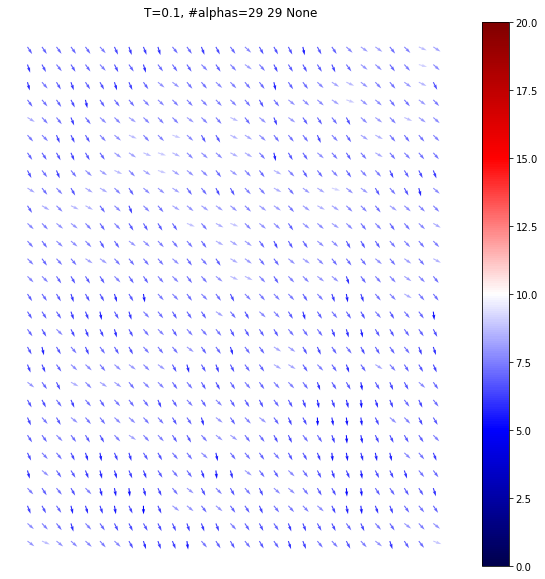

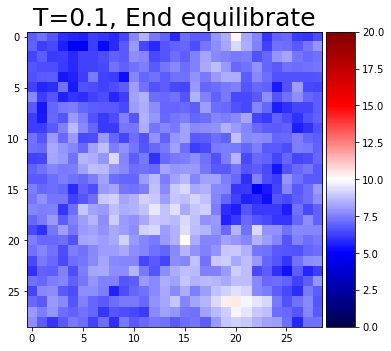

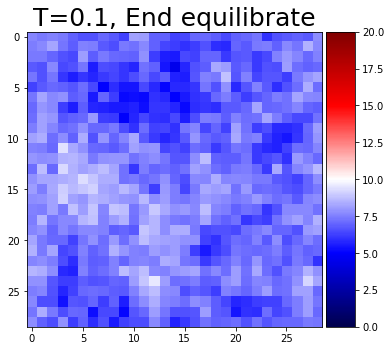

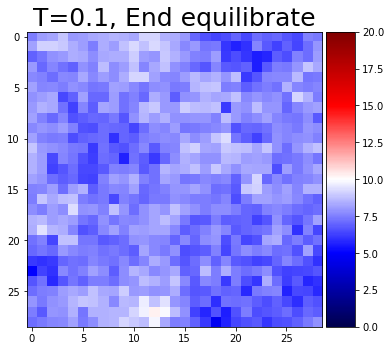

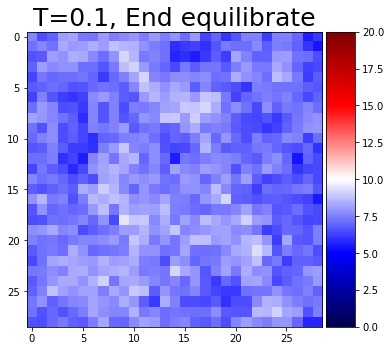

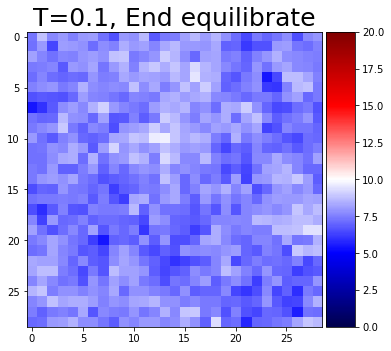

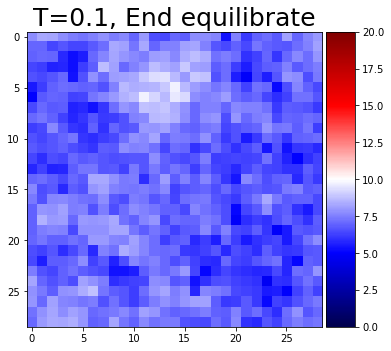

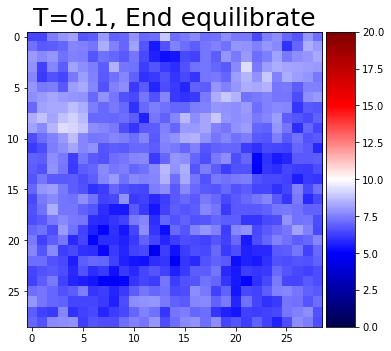

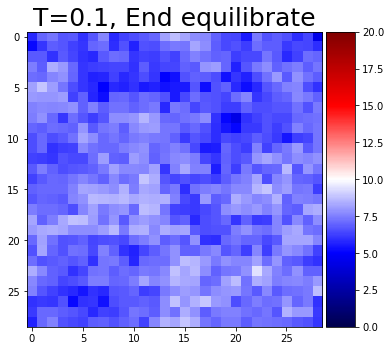

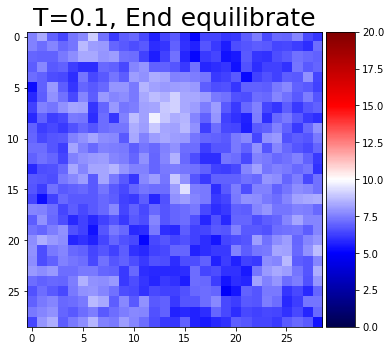

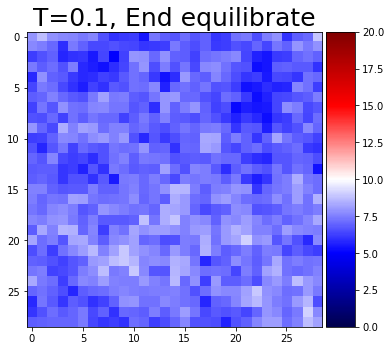

In [3]:
from XY_model import XYSystem
import pandas as pd 

url = f"https://raw.githubusercontent.com/marcin119a/data-thetas-st/main/data_7_5/thetas_prior_1.csv"
thetas = pd.read_csv(url,  delimiter=',', header=None).to_numpy()
nSpots = 29*29
nTypes = 10 
b = 20
#thetas = truncexpon.rvs(b=20, size=(nSpots, nTypes))
#thetas_res = np.zeros((nSpots, nTypes))

xy_system_1 = XYSystem(temperature=0.1, thetas=thetas, supp_end=b)
xy_system_1.equilibrate(show=True)


In [24]:
from scipy.stats import truncexpon
from XY_model import XYSystem
import numpy as np
#

b = 20
nSpots = 30*30
nTypes = 1
thetas = truncexpon.rvs(b=b, scale=1/20, size=nSpots)
thetas_res = np.zeros((nSpots, nTypes))
#for i in range(thetas.shape[1]):
#    xy_system_1 = XYSystem(temperature=0.1, thetas=thetas[:, i], supp_end=b)
#    thetas_res[:, i] = xy_system_1.equilibrate(show=True)

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


def list2matrix(s):
    n = int(np.size(s))
    l = int(np.sqrt(n))
    s = np.reshape(s, (l, l))
    return s



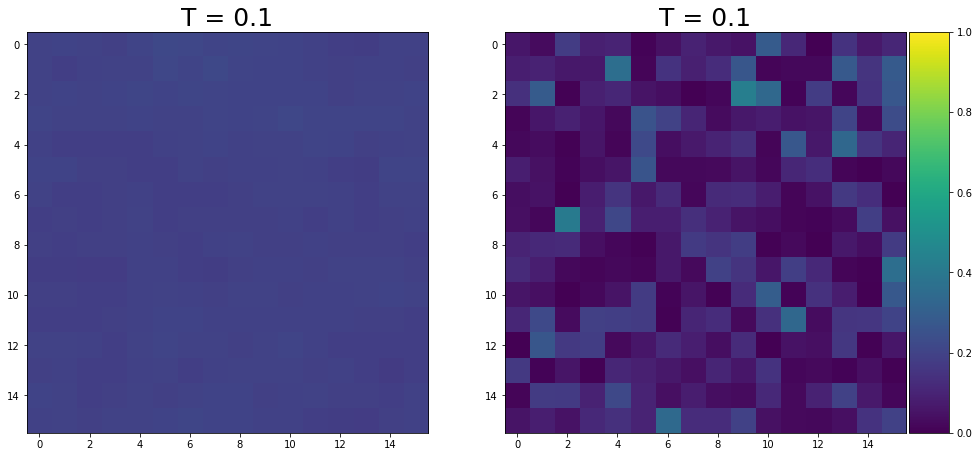

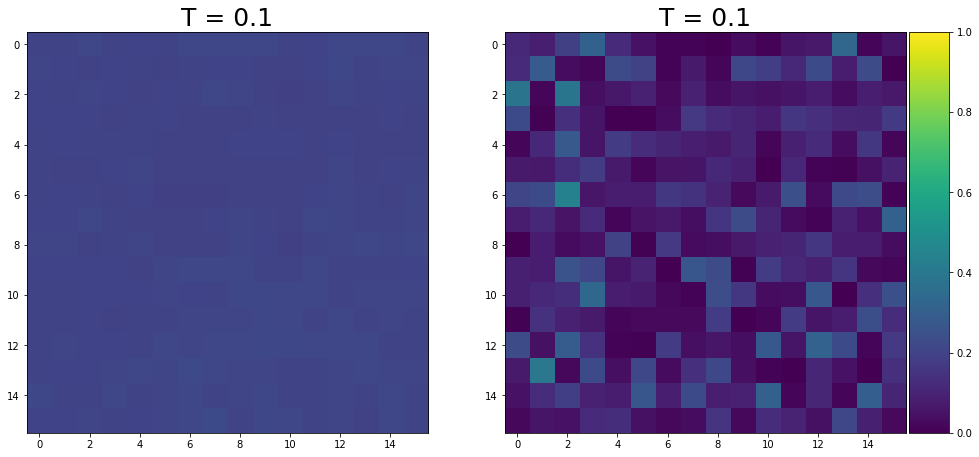

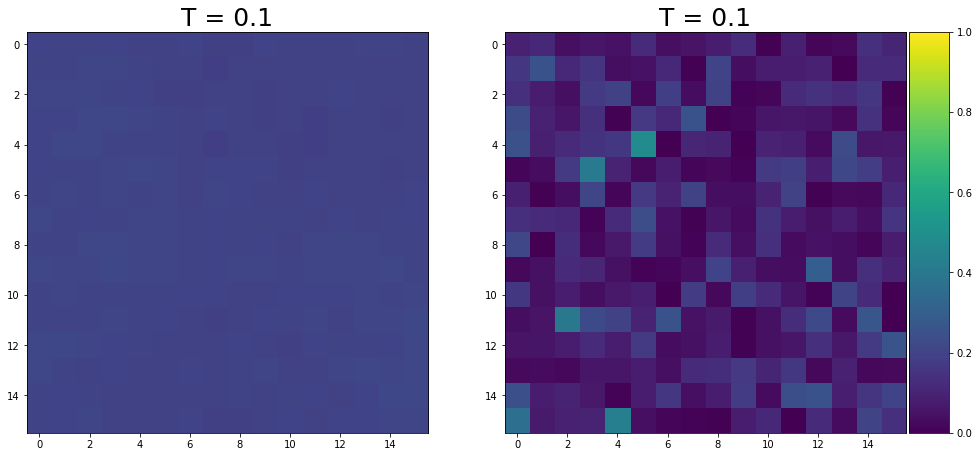

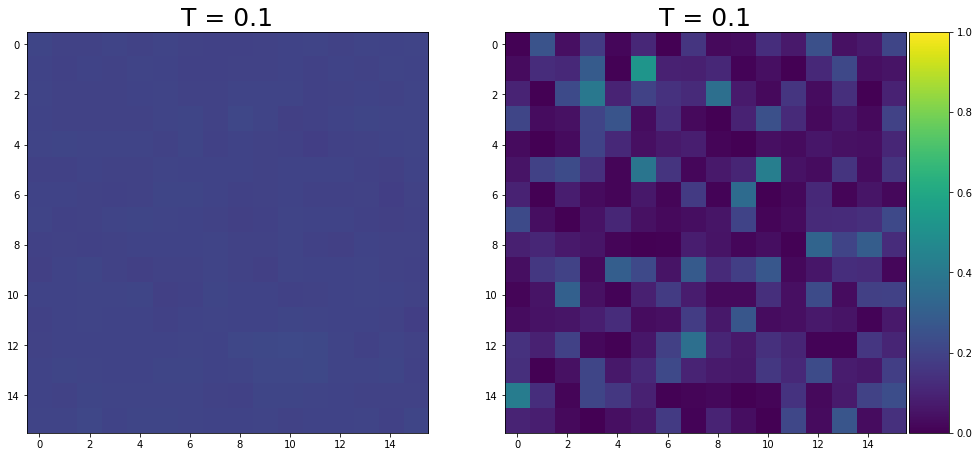

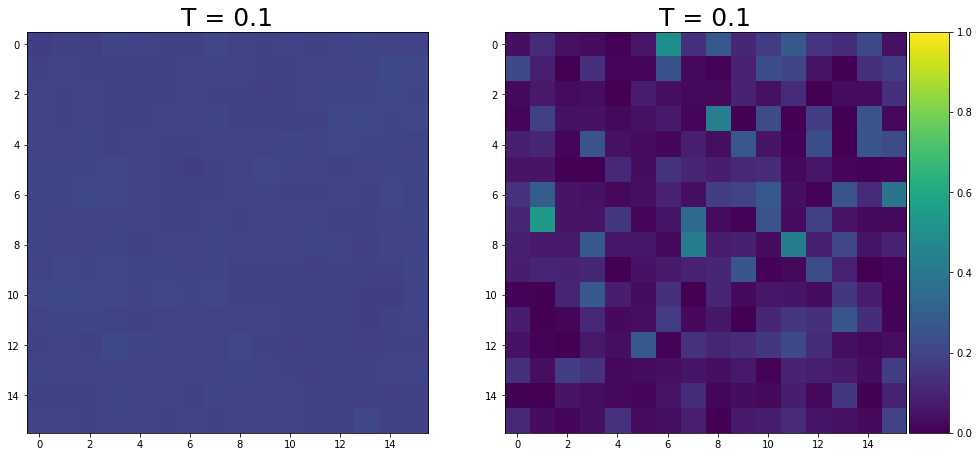

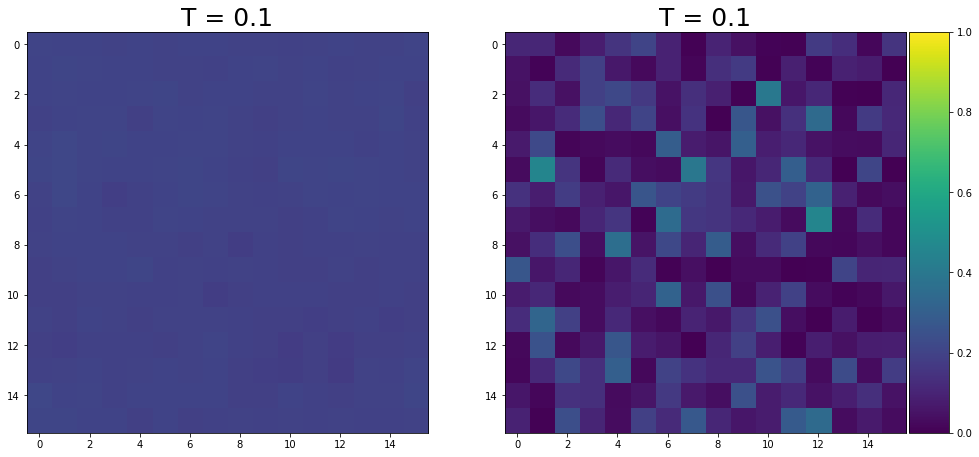

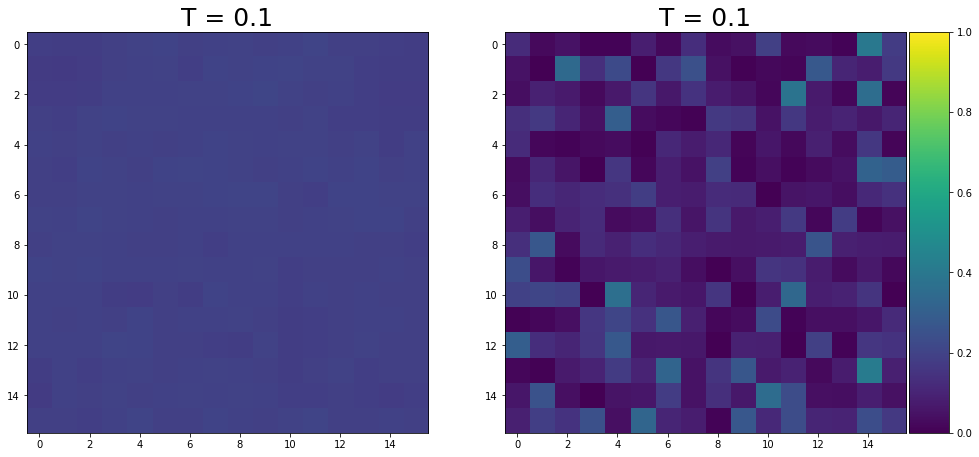

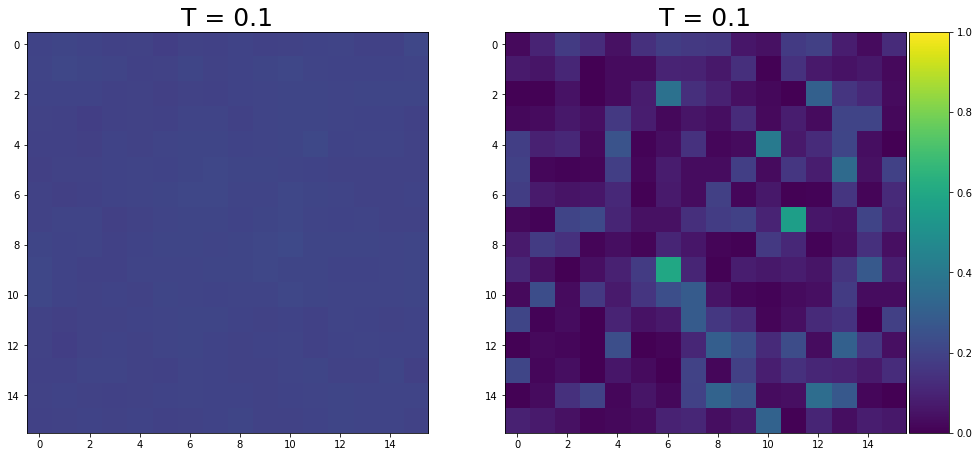

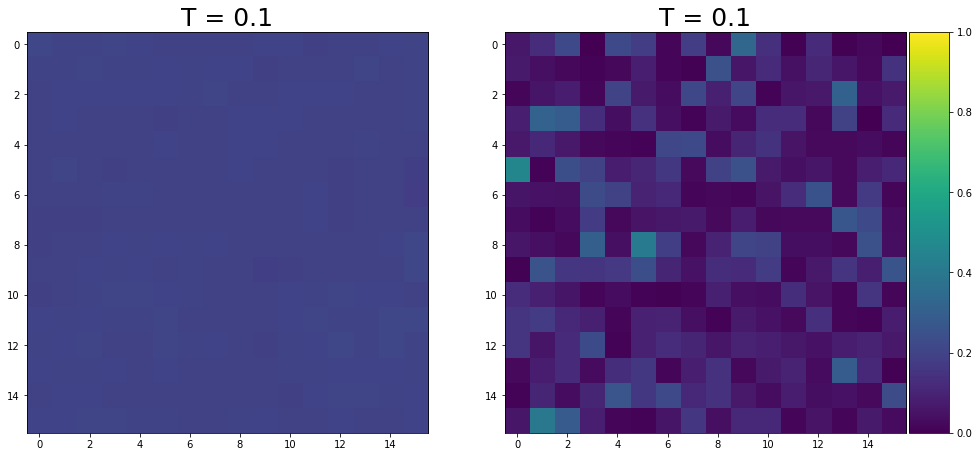

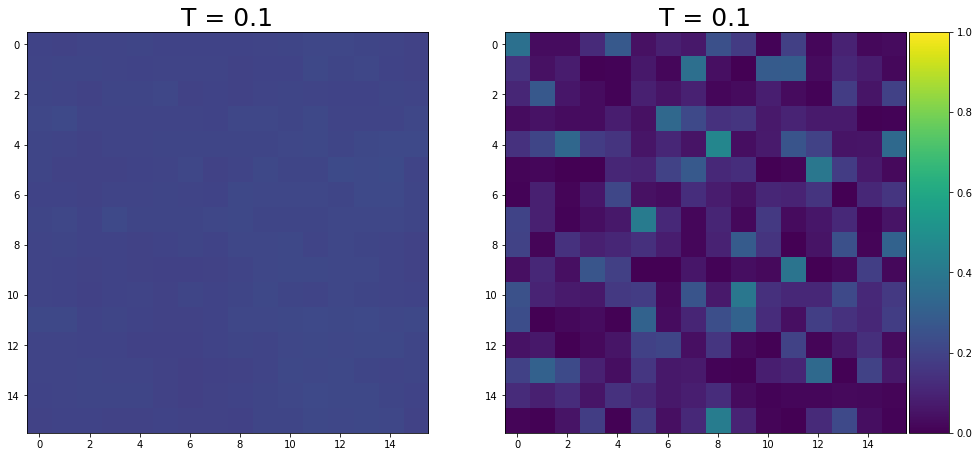

In [19]:
for i in range(10):
    fig = plt.figure(figsize=(20, 10))

    ax0 = fig.add_subplot(1,3,1)
    ax1 = fig.add_subplot(1,3,2)

    ax0.set_title("T = 0.1", fontsize=25)
    ax1.set_title("T = 0.1", fontsize=25)

    width = int(nSpots**(1/2))
    r = thetas_res[:, i]/thetas_res.sum(axis=1)
    hts = list2matrix(r)
    im0 = ax0.imshow(hts,  vmin=0, vmax=0.5)

    width = int(nSpots**(1/2))
    r = thetas[:, i]/thetas.sum(axis=1)
    hts = list2matrix(r)
    im1 = ax1.imshow(hts,  vmin=0, vmax=)

    divider0 = make_axes_locatable(ax0)
    cax0 = divider0.append_axes("right", size="10%", pad=0.05)

    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="10%", pad=0.05)

    cbar0 = fig.colorbar(im0, cax = cax0)
    fig.delaxes(fig.axes[2])

    cbar1 = fig.colorbar(im1, cax = cax1)

    fig.tight_layout(pad=1)

    plt.show()